# Header

Decision Tree and Naïve Bayes Cross-validation

Abdulrahman Abed

2/17/2022

# Task 1: Data Exploration and Preparation

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
from google.colab import data_table

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.naive_bayes import CategoricalNB

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 1.A

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Data_Sets/CD_additional_modified-v2.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      4117 non-null   int64  
 1   age             4117 non-null   int64  
 2   job             4117 non-null   object 
 3   marital         4117 non-null   object 
 4   education       4117 non-null   object 
 5   default         4117 non-null   object 
 6   housing         4117 non-null   object 
 7   loan            4117 non-null   object 
 8   contact         4117 non-null   object 
 9   month           4117 non-null   object 
 10  day_of_week     4117 non-null   object 
 11  duration        4117 non-null   int64  
 12  campaign        4117 non-null   int64  
 13  pdays           4117 non-null   int64  
 14  previous        4117 non-null   int64  
 15  poutcome        4117 non-null   object 
 16  emp_var_rate    4117 non-null   float64
 17  cons_price_idx  4117 non-null   f

In [ ]:
object_columns_list = list(df.select_dtypes(include='object').columns)
integer_columns_list = list(df.select_dtypes(include='int64').columns)
categorical_columns_list = object_columns_list + integer_columns_list
del categorical_columns_list[10]
print(categorical_columns_list)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'Unnamed: 0', 'age', 'duration', 'campaign', 'pdays', 'previous']


# 1.B

In [ ]:
df[categorical_columns_list] = df[categorical_columns_list].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Unnamed: 0      4117 non-null   category
 1   age             4117 non-null   category
 2   job             4117 non-null   category
 3   marital         4117 non-null   category
 4   education       4117 non-null   category
 5   default         4117 non-null   category
 6   housing         4117 non-null   category
 7   loan            4117 non-null   category
 8   contact         4117 non-null   category
 9   month           4117 non-null   category
 10  day_of_week     4117 non-null   category
 11  duration        4117 non-null   category
 12  campaign        4117 non-null   category
 13  pdays           4117 non-null   category
 14  previous        4117 non-null   category
 15  poutcome        4117 non-null   category
 16  emp_var_rate    4117 non-null   float64 
 17  cons_price_idx

In [ ]:
df = df.select_dtypes(include=('category','object'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Unnamed: 0   4117 non-null   category
 1   age          4117 non-null   category
 2   job          4117 non-null   category
 3   marital      4117 non-null   category
 4   education    4117 non-null   category
 5   default      4117 non-null   category
 6   housing      4117 non-null   category
 7   loan         4117 non-null   category
 8   contact      4117 non-null   category
 9   month        4117 non-null   category
 10  day_of_week  4117 non-null   category
 11  duration     4117 non-null   category
 12  campaign     4117 non-null   category
 13  pdays        4117 non-null   category
 14  previous     4117 non-null   category
 15  poutcome     4117 non-null   category
 16  y            4117 non-null   object  
dtypes: category(16), object(1)
memory usage: 311.1+ KB


# 1.C

In [ ]:
y_target = df.pop('y')

# 1.D

In [ ]:
y_target = pd.get_dummies(y_target,drop_first=True)

# 1.E


In [ ]:
df["y_target"] = pd.get_dummies(y_target,drop_first=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# 1.F

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Unnamed: 0   4117 non-null   category
 1   age          4117 non-null   category
 2   job          4117 non-null   category
 3   marital      4117 non-null   category
 4   education    4117 non-null   category
 5   default      4117 non-null   category
 6   housing      4117 non-null   category
 7   loan         4117 non-null   category
 8   contact      4117 non-null   category
 9   month        4117 non-null   category
 10  day_of_week  4117 non-null   category
 11  duration     4117 non-null   category
 12  campaign     4117 non-null   category
 13  pdays        4117 non-null   category
 14  previous     4117 non-null   category
 15  poutcome     4117 non-null   category
 16  y_target     4117 non-null   uint8   
dtypes: category(16), uint8(1)
memory usage: 283.0 KB


In [ ]:
df.describe(include='all')

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y_target
count,4117.0,4117.0,4117,4117,4117,4117,4117,4117,4117,4117,4117,4117.0,4117.0,4117.0,4117.0,4117,4117.000000
unique,4117.0,67.0,12,4,7,2,3,3,2,10,5,828.0,25.0,21.0,7.0,3,NaN
top,0.0,32.0,admin.,married,university.degree,no,yes,no,cellular,may,thu,77.0,1.0,999.0,0.0,nonexistent,NaN
freq,1.0,216.0,1012,2508,1264,3314,2175,3347,2650,1378,860,24.0,1764.0,3957.0,3522.0,3522,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.109546
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.312361
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [ ]:
df.head(25)

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y_target
0,0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,0
1,1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,0
2,2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,0
3,3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,0
4,4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,0
5,5,32,services,single,university.degree,no,no,no,cellular,sep,thu,128,3,999,2,failure,0
6,6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,290,4,999,0,nonexistent,0
7,7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,44,2,999,0,nonexistent,0
8,8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,68,1,999,1,failure,0
9,9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,170,1,999,0,nonexistent,0


# 1.G

In [ ]:
onehot_df = pd.get_dummies(df, columns = categorical_columns_list)
onehot_df.head()

,y_target,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,...,campaign_14,campaign_15,campaign_16,campaign_17,campaign_18,campaign_19,campaign_22,campaign_23,campaign_24,campaign_27,campaign_29,campaign_35,pdays_0,pdays_1,pdays_2,pdays_3,pdays_4,pdays_5,pdays_6,pdays_7,pdays_9,pdays_10,pdays_11,pdays_12,pdays_13,pdays_14,pdays_15,pdays_16,pdays_17,pdays_18,pdays_19,pdays_21,pdays_999,previous_0,previous_1,previous_2,previous_3,previous_4,previous_5,previous_6
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0


# 1.H

In [ ]:
 #look at counts prior to the split 
onehot_df['y_target'].value_counts()

0    3666
1     451
Name: y_target, dtype: int64

In [ ]:
# Setting the random_state
random_state = 0

In [ ]:
# split 70/30
train_df,test_df = train_test_split(onehot_df, test_size=0.3, random_state = random_state)

# 1.I

In [ ]:
# Distribution (%) in whole input dataframe
onehot_df['y_target'].value_counts(normalize=True).mul(100).round(2).astype(str)+'%'

0    89.05%
1    10.95%
Name: y_target, dtype: object

In [ ]:
# Distribution (%) in training set
train_df['y_target'].value_counts(normalize=True).mul(100).round(2).astype(str)+'%'

0    88.96%
1    11.04%
Name: y_target, dtype: object

In [ ]:
# Distribution (%) in test set
test_df['y_target'].value_counts(normalize=True).mul(100).round(2).astype(str)+'%'

0    89.24%
1    10.76%
Name: y_target, dtype: object

# 1. J
### The differences between this CD dataset and the CD dataset from the previous assignment is...


# Task 2: Decision Tree Model

# 2.A

In [ ]:
# Separate data into independent and dependent portions first

# Obtain list
variable_list = list(set(list(train_df.columns)+list(test_df.columns)))
print("Total Number of Variables: "+str(len(variable_list)))

# Separate ind and dep
y_index = variable_list.index('y_target')
dependent_variable_list = [variable_list.pop(y_index)]
print("Dependent Variable: "+str(dependent_variable_list))
independent_variable_list = variable_list
print("Number of Independent Variables: "+str(len(independent_variable_list)))

# Separate training and testing ind and dep variabels and perform sanity check
X_train = train_df[independent_variable_list].to_numpy()
print("Training Independent Data Shape: "+str(X_train.shape))
y_train = train_df[dependent_variable_list].to_numpy().reshape(-1)
print("Training Dependent Data Shape: "+str(y_train.shape))
print("Training Data Set Shape: "+str(train_df.shape))
X_test = test_df[independent_variable_list].to_numpy()
print("Testing Independent Data Shape: "+str(X_test.shape))
y_test = test_df[dependent_variable_list].to_numpy().reshape(-1)
print("Testing Dependent Data Shape: "+str(y_test.shape))
print("Testing Data Set Shape: "+str(test_df.shape))




Total Number of Variables: 5117
Dependent Variable: ['y_target']
Number of Independent Variables: 5116
Training Independent Data Shape: (2881, 5116)
Training Dependent Data Shape: (2881,)
Training Data Set Shape: (2881, 5117)
Testing Independent Data Shape: (1236, 5116)
Testing Dependent Data Shape: (1236,)
Testing Data Set Shape: (1236, 5117)


In [ ]:
# Defining and fitting decision tree model 

decision_tree_1 = DecisionTreeClassifier(random_state=random_state)
print(decision_tree_1)

decision_tree_1 = decision_tree_1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)


# 2.B

In [ ]:
# Print the decision tree summary 
decision_tree_model_1 = export_text(decision_tree_1)
print(decision_tree_model_1)

|--- feature_2242 <= 0.50
|   |--- feature_53 <= 0.50
|   |   |--- feature_3876 <= 0.50
|   |   |   |--- feature_1782 <= 0.50
|   |   |   |   |--- feature_3588 <= 0.50
|   |   |   |   |   |--- feature_4100 <= 0.50
|   |   |   |   |   |   |--- feature_588 <= 0.50
|   |   |   |   |   |   |   |--- feature_1540 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_1572 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_3530 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_3338 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |   |--- feature_3338 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_3530 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_1572 >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_1540 >  0.50
|   |   |   |   | 

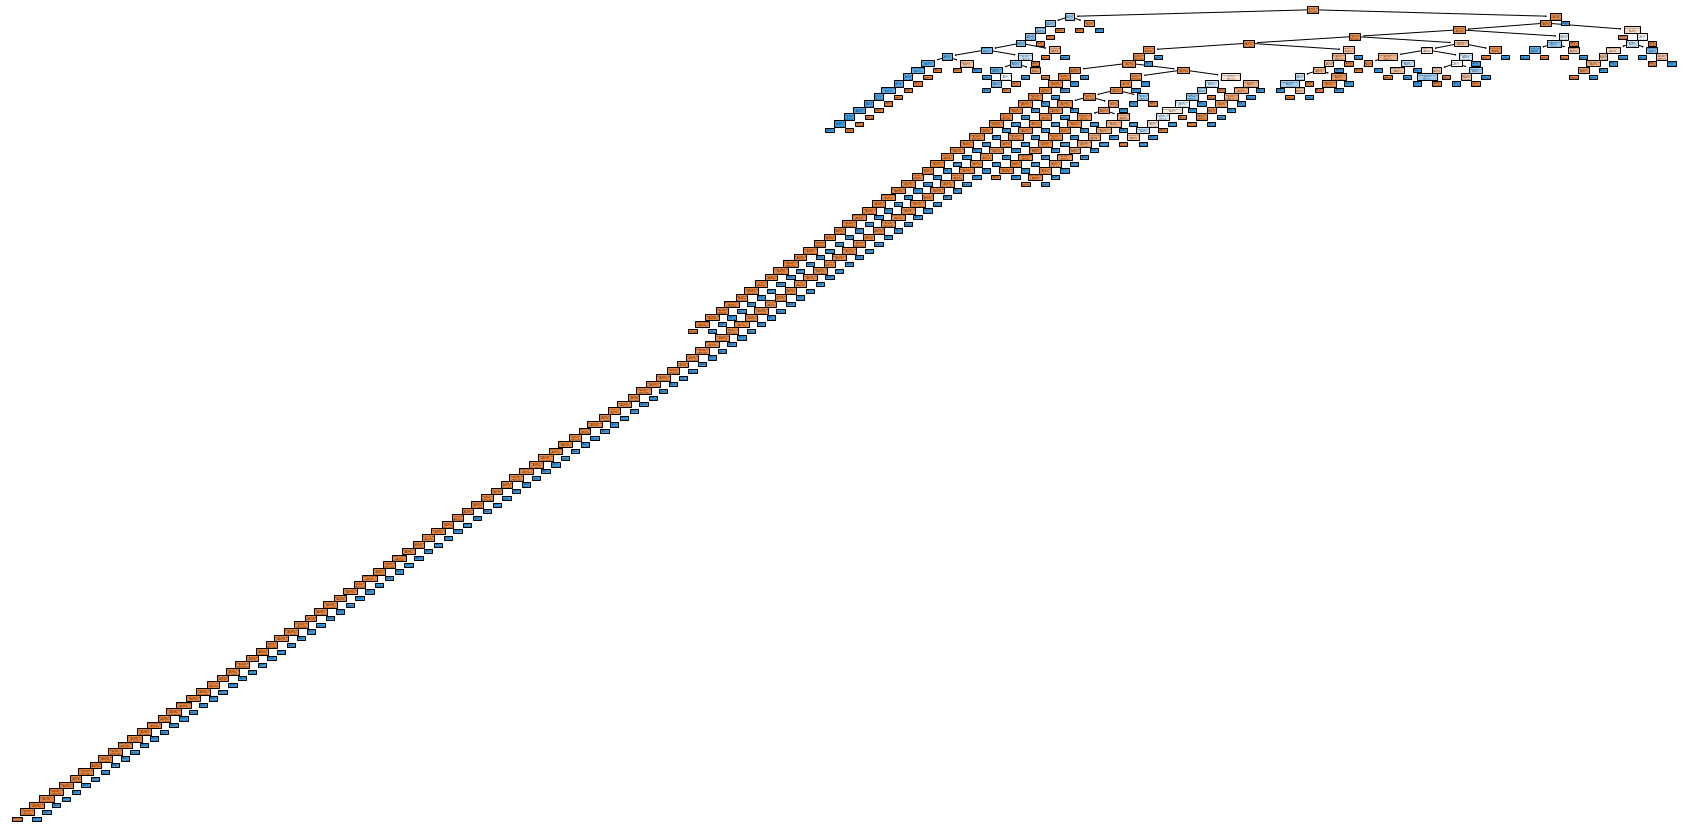

In [ ]:
# Plot decision tree
fig = plt.figure(figsize=(30,15))
ax = plot_tree(decision_tree_1,feature_names=independent_variable_list,filled=True)

# 2.C

In [ ]:
# Make predictions on the training and testing sets using the fitted model

predictions_train_1 = decision_tree_1.predict(X_train)

predictions_test_1 = decision_tree_1.predict(X_test)


# 2.D

In [ ]:
# Confustion matrix for training set
confusion_matrix(y_train,predictions_train_1,labels=[0,1])

array([[2563,    0],
       [   0,  318]])

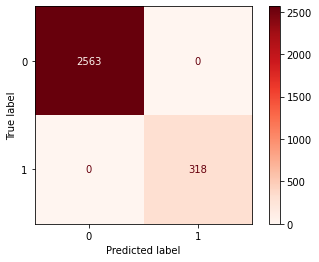

In [ ]:
# Confusion matrix as plot: training set
con_mat_train = confusion_matrix(y_train,predictions_train_1,labels=[0,1])
ax = ConfusionMatrixDisplay(confusion_matrix=con_mat_train,display_labels=[0,1])
ax.plot(values_format='',cmap=plt.cm.Reds)
plt.show()

In [ ]:
# confustion matrix for test set
confusion_matrix(y_test,predictions_test_1,labels=[0,1])

array([[1062,   41],
       [ 105,   28]])

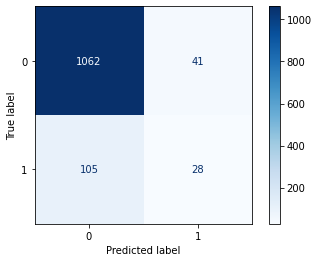

In [ ]:
# confustion matrix as plot: test set
con_mat_test = confusion_matrix(y_test,predictions_test_1,labels=[0,1])
ax = ConfusionMatrixDisplay(confusion_matrix=con_mat_test,display_labels=[0,1])
ax.plot(values_format='',cmap=plt.cm.Blues)
plt.show()

# 2.E

In [ ]:
# Classification report training set
print(classification_report(y_train,predictions_train_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2563
           1       1.00      1.00      1.00       318

    accuracy                           1.00      2881
   macro avg       1.00      1.00      1.00      2881
weighted avg       1.00      1.00      1.00      2881



In [ ]:
# Classification report test set
print(classification_report(y_test,predictions_test_1))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1103
           1       0.41      0.21      0.28       133

    accuracy                           0.88      1236
   macro avg       0.66      0.59      0.61      1236
weighted avg       0.86      0.88      0.86      1236



# 2.F (Incomplete)

# Task 3: Naive Bayes Model for Hold-Out Evaluation

# 3.A

In [ ]:
from sklearn.naive_bayes import CategoricalNB

In [ ]:
# Define and train Categorical Naive Bayes model 
categorical_nb = CategoricalNB(alpha=2.0)
categorical_nb = categorical_nb.fit(X_train,y_train)


# 3.B

In [ ]:
# Predict on training datasets
categorical_nb_predictions_train = categorical_nb.predict(X_train)

In [ ]:
categorical_nb = categorical_nb.fit(X_test,y_test)

In [ ]:
# Predict on the test dataset
categorical_nb_predictions_test = categorical_nb.predict(X_test)


# 3.C

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

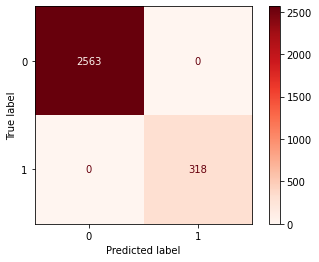

In [ ]:
con_mat_train = confusion_matrix(y_train,predictions_train_1,labels=[0,1])
ax = ConfusionMatrixDisplay(confusion_matrix=con_mat_train,display_labels=[0,1])
ax.plot(values_format='',cmap=plt.cm.Reds)
plt.show()

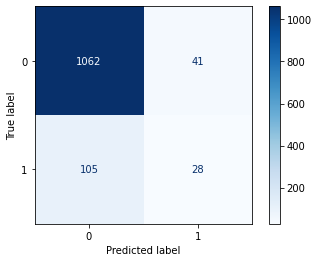

In [ ]:
con_mat_test = confusion_matrix(y_test,predictions_test_1,labels=[0,1])
ax = ConfusionMatrixDisplay(confusion_matrix=con_mat_test,display_labels=[0,1])
ax.plot(values_format='',cmap=plt.cm.Blues)
plt.show()

# 3.D

In [ ]:
print(classification_report(y_train,predictions_train_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2563
           1       1.00      1.00      1.00       318

    accuracy                           1.00      2881
   macro avg       1.00      1.00      1.00      2881
weighted avg       1.00      1.00      1.00      2881



In [ ]:
print(classification_report(y_test,predictions_test_1))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1103
           1       0.41      0.21      0.28       133

    accuracy                           0.88      1236
   macro avg       0.66      0.59      0.61      1236
weighted avg       0.86      0.88      0.86      1236



# 3.E (Incomplete)

# Task 4: Naive Bayes Model for Cross-Validation

# 4.A

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
print("Training Independent Data Shape: "+str(X_train.shape))
print("Testing Independent Data Shape: "+str(X_test.shape))
X_full = np.concatenate((X_train,X_test),axis=0)
print("Full Independent Data Shape: "+str(X_full.shape))

Training Independent Data Shape: (2881, 5116)
Testing Independent Data Shape: (1236, 5116)
Full Independent Data Shape: (4117, 5116)


In [ ]:
print("Training Dependent Data Shape: "+str(y_train.shape))
print("Testing Dependent Data Shape: "+str(y_test.shape))
y_full = np.concatenate((y_train,y_test),axis=0)
print("Full Dependent Data Shape: "+str(y_full.shape))

Training Dependent Data Shape: (2881,)
Testing Dependent Data Shape: (1236,)
Full Dependent Data Shape: (4117,)


# 4.B

In [ ]:
categorical_nb_cross = CategoricalNB()

In [ ]:
five_fold_cv_results = cross_validate(categorical_nb_cross,X_full,y_full,cv=5,scoring=['accuracy','f1','precision','recall'],return_train_score=True)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return cache[method]
KeyError: 'predict'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packag

In [ ]:
five_fold_cv_results_df = cross_validate(categorical_nb_cross,X_full,y_full, cv=5, scoring=['accuracy','f1','recall','precision'],return_train_score=True)
pd.DataFrame(five_fold_cv_results_df)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return cache[method]
KeyError: 'predict'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 258, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.7/dist-packag

,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1,test_recall,train_recall,test_precision,train_precision
0,3.455204,0.030668,NaN,0.905254,NaN,0.347280,NaN,0.229917,NaN,0.709402
1,3.981980,0.025794,NaN,0.907076,NaN,0.343348,NaN,0.222222,NaN,0.754717
2,1.066474,0.011095,NaN,0.904675,NaN,0.343096,NaN,0.227147,NaN,0.700855
3,0.870070,0.014654,NaN,0.906193,NaN,0.352201,NaN,0.232687,NaN,0.724138
4,0.895677,0.011989,NaN,0.907104,NaN,0.362500,NaN,0.240997,NaN,0.731092


# 4.C

In [ ]:
five_fold_cv_results

{'fit_time': array([1.88751936, 1.75482464, 0.84073162, 0.85955477, 0.86986542]),
 'score_time': array([0.01760626, 0.0138588 , 0.01083064, 0.01052547, 0.01331329]),
 'test_accuracy': array([nan, nan, nan, nan, nan]),
 'test_f1': array([nan, nan, nan, nan, nan]),
 'test_precision': array([nan, nan, nan, nan, nan]),
 'test_recall': array([nan, nan, nan, nan, nan]),
 'train_accuracy': array([0.90525357, 0.90707561, 0.90467517, 0.90619308, 0.90710383]),
 'train_f1': array([0.34728033, 0.34334764, 0.34309623, 0.35220126, 0.3625    ]),
 'train_precision': array([0.70940171, 0.75471698, 0.7008547 , 0.72413793, 0.73109244]),
 'train_recall': array([0.2299169 , 0.22222222, 0.22714681, 0.23268698, 0.24099723])}

In [ ]:
print("Five-fold Cross-Validation Training Accuracy: "+str(five_fold_cv_results['train_accuracy'].mean().round(5)))
print("Five-fold Cross-Validation Training Precision: "+str(five_fold_cv_results['train_precision'].mean().round(5)))
print("Five-fold Cross-Validation Training Recall: "+str(five_fold_cv_results['train_recall'].mean().round(5)))
print("Five-fold Cross-Validation Training F-Score: "+str(five_fold_cv_results['train_f1'].mean().round(5)))
print("\n") # newline character
print("Five-fold Cross-Validation Testing Accuracy: "+str(five_fold_cv_results['test_accuracy'].mean().round(5)))
print("Five-fold Cross-Validation Testing Precision: "+str(five_fold_cv_results['test_precision'].mean().round(5)))
print("Five-fold Cross-Validation Testing Recall: "+str(five_fold_cv_results['test_recall'].mean().round(5)))
print("Five-fold Cross-Validation Testing F-Score: "+str(five_fold_cv_results['test_f1'].mean().round(5)))

Five-fold Cross-Validation Training Accuracy: 0.90606
Five-fold Cross-Validation Training Precision: 0.72404
Five-fold Cross-Validation Training Recall: 0.23059
Five-fold Cross-Validation Training F-Score: 0.34969


Five-fold Cross-Validation Testing Accuracy: nan
Five-fold Cross-Validation Testing Precision: nan
Five-fold Cross-Validation Testing Recall: nan
Five-fold Cross-Validation Testing F-Score: nan


In [ ]:
%%shell
 jupyter nbconvert --to html /content/Assignment4_Abed_Abdulrahman.ipynb

[NbConvertApp] Converting notebook /content/Assignment4_Abed_Abdulrahman.ipynb to html
[NbConvertApp] Writing 559888 bytes to /content/Assignment4_Abed_Abdulrahman.html
